In [92]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [93]:
tumor = os.listdir('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Brain Tumor')
no_tumor = os.listdir('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Healthy')

In [94]:
number_tumor = len(tumor)
print("Number of Tumor Images: ",number_tumor)
number_no_tumor = len(no_tumor)
print("Number of Non-Tumor Images: ",number_no_tumor)

Number of Tumor Images:  2513
Number of Non-Tumor Images:  2087


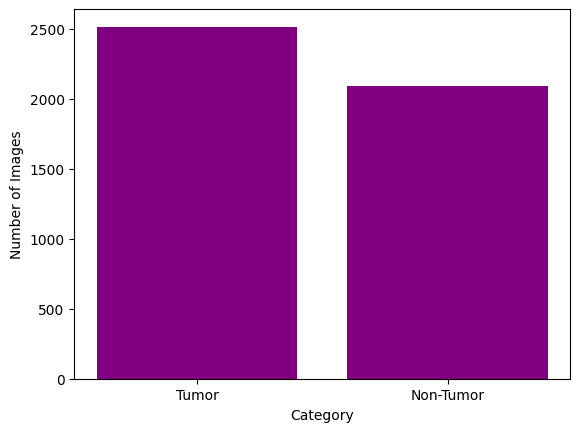

In [164]:
data = {'Tumor' : number_tumor, 'Non-Tumor' : number_no_tumor}
x = data.keys()
values = data.values()
plt.bar(x,values,color='purple')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.tight_layout
plt.show()

In [ ]:
# import imutils
# # def crop_brain_tumor(image,plot=False):
# #   gray = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY)
# #   gray = cv2.GaussianBlur(gray,(5,5),0)

# #   thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
# #   thres = cv2.erode(thres, None, Iteration=2)
# #   thres = cv2.dilate(thres, None, Iteration=2)

# #   cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# #   cnts = imutils.grab_contours(cnts)
# #   c = max(cnts, key = cv2.contourArea)

# #   extLeft = tuple(c[c[:,:,0].argmin()][0])
# #   extRight = tuple(c[c[:,:,0].argmax()][0])
# #   extTop = tuple(c[c[:,:,1].argmin()][0])
# #   extBot = tuple(c[c[:,:,1].argmax()][0])

# #   new_image = image[extTop[1]:extBot[1],extLeft[0]:extRight[0]]
# def crop_brain_tumor(image, plot=False):
#     if image is None:
#         raise ValueError("Image is None. Check the file path.")

#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     gray = cv2.GaussianBlur(gray, (5, 5), 0)

#     thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thres = cv2.erode(thres, None, iterations=2)
#     thres = cv2.dilate(thres, None, iterations=2)

#     cnts, _ = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if not cnts:
#         raise ValueError("No contours found")

#     c = max(cnts, key=cv2.contourArea)
#     x, y, w, h = cv2.boundingRect(c)
#     crop = image[y:y + h, x:x + w]

#     if plot:
#         import matplotlib.pyplot as plt
#         plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
#         plt.title("Cropped Tumor Region")
#         plt.axis("off")
#         plt.show()

#     return crop


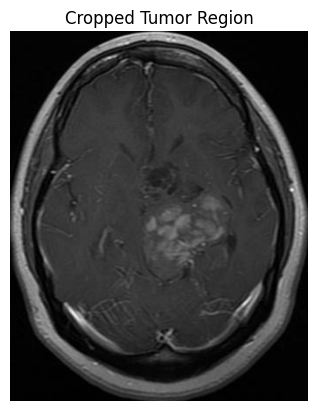

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]], dtype=uint8)

In [ ]:
# img = cv2.imread('C:\\Users\\agamb\\Desktop\\Project\\Brain Tumor Data Set\\Brain Tumor\\Cancer (1).jpg')

# crop_brain_tumor(img, True)

In [ ]:
# import os
# import cv2
# import numpy as np
# from sklearn.utils import shuffle

# def load_data(dir_list, image_size):
#     X = []
#     y = []

#     image_width, image_height = image_size
#     for directory in dir_list:
#         for filename in os.listdir(directory):
#             image_path = os.path.join(directory, filename)
#             image = cv2.imread(image_path)

#             if image is None:
#                 continue  

#             image = crop_brain_tumor(image, plot=False)
#             image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
#             image = image / 255.0
#             X.append(image)

#             if 'yes' in directory.lower():
#                 y.append(1)
#             else:
#                 y.append(0)

#     X = np.array(X,dtype=np.float32)
#     y = np.array(y,dtype=np.float32)
#     X, y = shuffle(X, y)
    
#     print(f"Number of examples: {len(X)}")
#     print(f"X shape: {X.shape}")
#     print(f"Y shape: {y.shape}")
    
#     return X, y


In [99]:
# tumor_path = 'C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Brain Tumor'
# no_tumor_path = 'C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Healthy'
# IMAGE_WIDTH, IMAGE_HEIGHT = (128, 128)

# X, y = load_data([tumor_path, no_tumor_path], (IMAGE_WIDTH, IMAGE_HEIGHT))

In [100]:
# original_dataset_tumor = os.path.join('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Brain Tumor')
# original_dataset_no = os.path.join('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Healthy')

In [101]:
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     horizontal_flip=True,         
#     vertical_flip=True,           
#     rotation_range=40,
#     shear_range=0.2,
#     width_shift_range=0.4,
#     height_shift_range=0.4,
#     fill_mode='nearest',
#     validation_split=0.2         
# )

# valid_data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
# test_data_gen = ImageDataGenerator(rescale=1.0/255)


In [102]:
# train_datagenerator = train_datagen.flow_from_directory('Brain Tumor Data Set',   
#     target_size=(150, 150),        
#     batch_size=64,
#     class_mode='binary',      
#     subset='training',
#     shuffle=True,
#     seed=42
# )

In [103]:
# validation_generator = train_datagen.flow_from_directory(
#     'Brain Tumor Data Set',
#     target_size=(150, 150),
#     batch_size=64,
#     class_mode='binary',
#     subset='validation',
#     shuffle=True,
#     seed=42
# )

In [104]:
# print(train_datagenerator.class_indices)
# print(train_datagenerator.samples)
# print(validation_generator.samples)

In [105]:
# batch_x, batch_y = next(train_datagenerator)
# print("Batch Y unique labels:", np.unique(batch_y))

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# ✅ Paths (Make sure these folder names are exactly correct)
data_path = "C:/Users/agamb/Desktop/Project/Brain Tumor Data Set"

# --- Image Augmentation & Normalization ---
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ 20% Validation split
)

# --- Training Data ---
train_generator = train_datagen.flow_from_directory(
    directory=data_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

# --- Validation Data ---
val_generator = train_datagen.flow_from_directory(
    directory=data_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

# ✅ Check if both classes are detected
print("\nClass Indices:", train_generator.class_indices)
print("Training Samples:", train_generator.samples)
print("Validation Samples:", val_generator.samples)

# ✅ Quick check of labels distribution
y_train_batch = []
for i in range(len(train_generator)):
    _, y_batch = next(train_generator)
    y_train_batch.extend(y_batch)
y_train_batch = np.array(y_train_batch)

print("\nUnique labels in Training Data:", np.unique(y_train_batch, return_counts=True))


Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.

Class Indices: {'Brain Tumor': 0, 'Healthy': 1}
Training Samples: 3681
Validation Samples: 919

Unique labels in Training Data: (array([0., 1.], dtype=float32), array([2011, 1670]))


In [107]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam    

# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3,3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(128, (3,3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # binary classification
# ])


In [108]:
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [109]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(train_generator.classes),
#     y=train_generator.classes
# )
# class_weights = dict(enumerate(class_weights))
# print("Class Weights:", class_weights)

# history = model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=val_generator,
#     class_weight=class_weights
# )


In [110]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# --- Load VGG19 with pretrained weights ---
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# --- Freeze base layers (so pretrained features remain intact) ---
for layer in vgg.layers:
    layer.trainable = False

# --- Add custom classification layers ---
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# --- Final Model ---
model_vgg19 = Model(inputs=vgg.input, outputs=predictions)

# --- Compile ---
model_vgg19.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# --- Train ---
history_vgg19 = model_vgg19.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# --- Evaluate ---
val_loss, val_acc = model_vgg19.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 164s 706ms/step - accuracy: 0.5455 - loss: 0.7193 - val_accuracy: 0.6496 - val_loss: 0.6342
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 156s 674ms/step - accuracy: 0.6574 - loss: 0.6112 - val_accuracy: 0.6703 - val_loss: 0.5930
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 171s 741ms/step - accuracy: 0.7042 - loss: 0.5641 - val_accuracy: 0.6801 - val_loss: 0.5756
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 174s 754ms/step - accuracy: 0.7279 - loss: 0.5415 - val_accuracy: 0.7203 - val_loss: 0.5453
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 157s 680ms/step - accuracy: 0.7526 - loss: 0.5094 - val_accuracy: 0.7182 - val_loss: 0.5349
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 163s 707ms/step - accuracy: 0.7723 - loss: 0.4963 - val_accuracy: 0.7280 - val_loss: 0.5458
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 167s 722ms/step - accuracy: 0.7875 - loss: 0.4751 - val_accuracy: 0.7388 - val_loss: 0.5221
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 163s 707ms/step - accuracy: 0.7949 -

In [111]:
model_vgg19.evaluate(val_generator)

58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 571ms/step - accuracy: 0.7656 - loss: 0.5065


[0.48759725689888, 0.7671381831169128]

In [112]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img = image.load_img('./Brain Tumor Data Set/Brain Tumor/Cancer (198).jpg', target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [113]:
prediction = model_vgg19.predict(img_array)

# Binary classification (0: No Tumor, 1: Tumor)
if prediction[0][0] > 0.5:
    print("Tumor Detected")
else:
    print("No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
No Tumor Detected


In [ ]:
model.save('brain_tumor_model.h5')  

58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 556ms/step


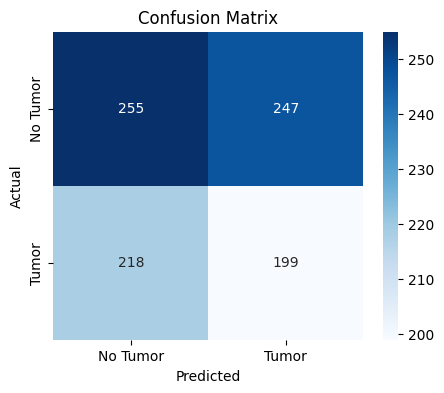


Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.54      0.51      0.52       502
       Tumor       0.45      0.48      0.46       417

    accuracy                           0.49       919
   macro avg       0.49      0.49      0.49       919
weighted avg       0.50      0.49      0.49       919



In [115]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels
true_labels = val_generator.classes

# Get predictions
pred_probs = model_vgg19.predict(val_generator)
pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=['No Tumor', 'Tumor']))


In [116]:
model_vgg19.save('brain_tumor_model.h5')  

In [160]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img = image.load_img('2.jpg', target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [161]:
prediction = model_vgg19.predict(img_array)

# Binary classification (0: No Tumor, 1: Tumor)
if prediction[0][0] > 0.5:
    print("Not Tumor Detected")
else:
    print("Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
Not Tumor Detected
